In [140]:
# Dataset: fruits.zip
# Location: https://mitu.co.in/dataset

Dataset Location

In [141]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

#### Load the data

In [142]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [143]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [144]:
train = train_datagen.flow_from_directory('fruits/training_set', class_mode = 'binary', target_size=(64,64))

Found 13 images belonging to 2 classes.


In [145]:
test = test_datagen.flow_from_directory('fruits/test_set', class_mode = 'binary', target_size=(64,64))

Found 6 images belonging to 2 classes.


#### Build the model

In [146]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), input_shape = (64,64,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [147]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_10 (Dense)            (None, 16)               

#### Compile the model

In [148]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [149]:
model.fit(train, epochs=10, validation_data= test, batch_size=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6514 - accuracy: 0.4615 - val_loss: 0.5546 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 271ms/step - loss: 0.5753 - accuracy: 1.0000 - val_loss: 0.5086 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 285ms/step - loss: 0.5258 - accuracy: 0.9231 - val_loss: 0.4656 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 259ms/step - loss: 0.4938 - accuracy: 0.8462 - val_loss: 0.4243 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 303ms/step - loss: 0.4455 - accuracy: 0.8462 - val_loss: 0.3771 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 299ms/step - loss: 0.3658 - accuracy: 0.9231 - val_loss: 0.3381 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 284ms/step - loss: 0.3448 - accuracy: 0.9231 - val_loss: 0.2979 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======

In [150]:
train.class_indices

{'apple': 0, 'orange': 1}

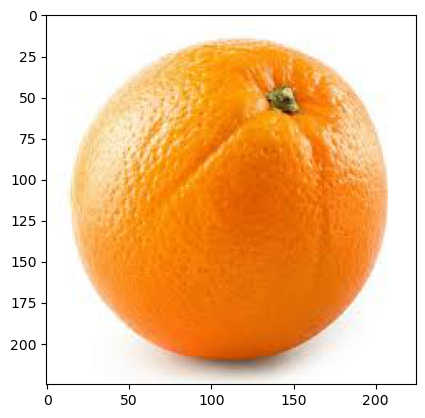

In [151]:
sample1 = plt.imread('fruits/sample1.jpg')
plt.imshow(sample1)

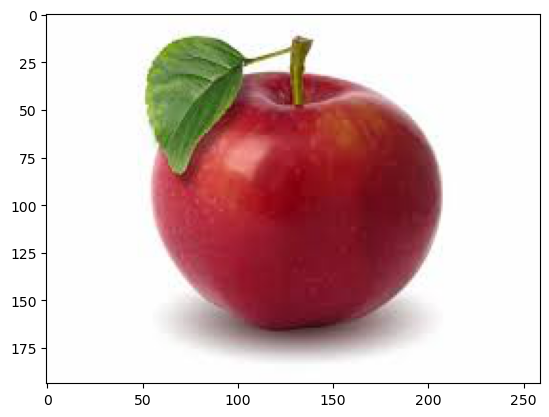

In [152]:
sample2 = plt.imread('fruits/sample2.jpg')
plt.imshow(sample2)

In [153]:
import cv2

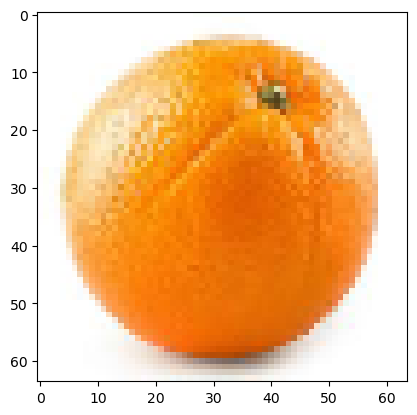

In [154]:
sample1 = cv2.resize(sample1, (64,64))
plt.imshow(sample1)

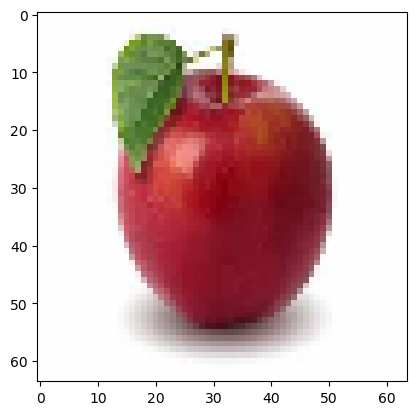

In [155]:
sample2 = cv2.resize(sample2, (64,64))
plt.imshow(sample2)

In [156]:
sample1.shape

(64, 64, 3)

In [157]:
train.class_indices

{'apple': 0, 'orange': 1}

In [158]:
def prediction(img):
    img = cv2.resize(img, (64,64))
    img = img.reshape(1,64,64,3)
    prediction = model.predict(img)
    if prediction > 0.5:
        return('Orange')
    else:
        return('Apple')

In [159]:
prediction(sample1)

1/1 [==============================] - 0s 114ms/step


'Orange'

In [160]:
prediction(sample2)

1/1 [==============================] - 0s 27ms/step


'Apple'

In [161]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [162]:
test_image = load_img('fruits/sample1.jpg', target_size=(64,64))

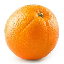

In [163]:
test_image


In [164]:
test_image = img_to_array(test_image)

In [165]:
test_image = np.expand_dims(test_image, axis=0)

In [166]:
test_image.shape

(1, 64, 64, 3)

In [167]:
def predict(img):
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction > 0.5:
        return('Orange')
    else:
        return('Apple')

In [168]:
test_image = load_img('fruits/sample1.jpg', target_size=(64,64))
predict(test_image)

1/1 [==============================] - 0s 148ms/step


'Orange'

In [169]:
test_image = load_img('fruits/sample2.jpg', target_size=(64,64))
predict(test_image)

1/1 [==============================] - 0s 47ms/step


'Apple'